# Conceptual

1. Prove that $\alpha$ given by (5.6) does indeed minimize $Var(\alpha X + (1 - \alpha) Y$.

**Solution**:

Three properties that is useful for the deduction:
* $Cov(a \cdot X, b\cdot Y) = ab \cdot Cov(X, Y)$
* $Var(X \pm Y) = Var(X) + Var(Y) \pm 2Cov(X, Y)$
* $Var(a \cdot X) = a^2 Var(X)$

$$\begin{align}Var(\alpha X + (1-\alpha)Y) &= Var(\alpha X) + Var((1-\alpha)Y) + 2Cov(\alpha X, (1-\alpha)Y) \\ &= \alpha^2 Var(X) + (1-\alpha)^2 Var(Y) + 2 \alpha (1-\alpha) Cov(X, Y) \end{align}$$

When $Var(\alpha X + (1-\alpha)Y)$ gets a minimum value, its derivative should be zero such that:

$$\begin{align} 2\alpha Var(X) - 2（1 - \alpha)Var(Y) + (2 - 4\alpha)Cov(X, Y) &= 0 \\ \Longrightarrow \alpha Var(X) + \alpha Var(Y) - Var(Y) + Cov(X, Y) - 2 \alpha Cov(X, Y) &= 0 \\ \Longrightarrow \alpha = \frac{Var(Y) - Cov(X, Y)}{Var(X) + Var(Y) - 2Cov(X, Y)} \\ \Longrightarrow \alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}\end{align}$$

2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of *n* observations.

(a) What is the probability that the first bootstrap observation is *not* the *j*th observation from the original sample?

**Solution**:

Let us denote this probability by $P_j$. As the probability of selecting a particular $x_j$ from the set $x_1,...,x_n$ is $1/n$, then the desired probability is

$$P_j = 1 - \frac1n$$

(b) What is the probability that the second bootstrap observation is *not* the *j*th observation from the original sample?

**Solution**:

The probability is $1 - \frac1n$ with the same reason as above.

(c) Argue that the probability that the *j*th observation is *not* in the bootstrap sample is $(1 - 1/n)^n$.

**Solution**:

As bootstrapping the sample with replacement, we have that the probability that the *j*th observation is not in the bootstrap sample is the product of the probabilities that each bootstrap observation is not the *j*th observation from the original sample

$$(1-1/n)\cdot \cdot \cdot(1-1/n) = (1-1/n)^n$$

as these probabilities are independant.

(d) When $n=5$, what is the probability that the *j*th observation is in the bootstrap sample?

**Solution**:

According to the description in (c), the probability that *j*th observation is in the bootstrap sample is $1 - (1 - 1/5)^5 = 0.672$.

(e) When $n=100$, what is the probability that the *j*th observation is in the bootstrap sample?

**Solution**:

The probability is $1 - (1 - 1/100)^{100} = 0.634$.

(f) When $n=10,000$, what is the probability that the *j*th  observation is in the bootstrap sample?

**Solution**:

The probability is $1 - (1 - 1/10000)^{10000} = 0.632$.

(g) Create a plot that displays, for each integer value of $n$ from 1 to 100,000, the probability that the *j*th observation is in the bootstrap sample.

**Solution**:

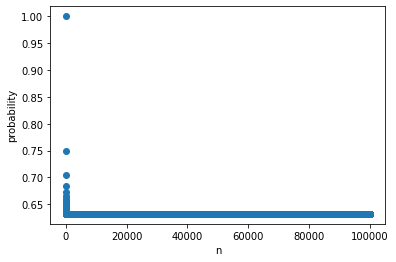

In [114]:
import numpy as np
import matplotlib.pyplot as plt
n = np.arange(1,100001)
p = 1 - (1 - 1/n)**n
plt.scatter(n, p)
plt.xlabel('n')
plt.ylabel('probability');

From the plot, we can see that the probability drops quickly and reaches an asymptote at about $0.632$.

(h) We will now investigate numerically the probability that a bootstrap sample of size $n=100$ contains the *j*th observation. Here $j=4$. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample. Comment on the results obtained.

**Solution**:

In [115]:
import pandas as pd
s = pd.Series(range(1,101))
store = [sum(s.sample(frac=1, replace=True)==4)>0
         for _ in range(1,10001)]

In [116]:
np.mean(store)

0.6401

Recall that the exponential function satisfies:

$$e^x = \lim\limits_{n \to \infty} (1 + \frac{x}{n})^n$$

Hence, we can easily see that the probability $P_j$ that the *j*th observation is not in the bootstrap sample is:

$$\begin{align} P_j &= \lim\limits_{n \to \infty} (1 - \frac1n)^n \\ &= e^{-1} \end{align}$$

Therefore, as $n$ increases, the probability of the *j*th observation being in the bootstrap samples is:

$$1 - P_j = 1 - e^{-1} \approx 0.63212$$.

The above demonstrates the often encountered statement about the bootstrap:

> On average, each bootstrap sample makes use of around two-thirds of the observations.

3. We now review *k*-fold cross-validation

(a) Explain how *k*-fold cross-validatino is implemented.

**Solution**:

The *k*-fold cross validation is implemented by taking the $n$ observations and randomly splitting it into $k$ non-overlapping groups with the length of (approximately) $n/k$. These groups acts as a validation set, and the remainder (of length n−n/k) acts as a training set. The test error is then estimated by averaging the $k$ resulting *MSE* estimates.

(b) What are the advantages and disadvantages of *k*-fold cross-validation relative to:
* The validation set approach?
* LOOCV?

**Solution**:

i. The validation set approach:

The validation set approach has two main drawbacks compared to *k*-fold cross-validation. 
* First, the validation estimate of the test error rate can be highly variable (depending on precisely which observations are included in the training set and which observations are included in the validation set). 
* Second, only a subset of the observations are used to fit the model. Since statistical methods tend to perform worse when trained on fewer observations, this suggests that the validation set error rate may tend to overestimate the test error rate for the model fit on the entire data set.

ii. LOOCV:

The LOOCV cross-validation approach is a special case of k-fold cross-validation in which $k=n$. This approach has two drawbacks compared to k-fold cross-validation. 
* First, it requires fitting the potentially computationally expensive model $n$ times compared to *k*-fold cross-validation which requires the model to be fitted only $k$ times. 
* Second, the LOOCV cross-validation approach may give approximately unbiased estimates of the test error, since each training set contains $n−1$ observations; however, this approach has higher variance than *k*-fold cross-validation (since we are averaging the outputs of $n$ fitted models trained on an almost identical set of observations, these outputs are highly correlated, and the mean of highly correlated quantities has higher variance than less correlated ones). 

So, there is a bias-variance trade-off associated with the choice of $k$ in *k*-fold cross-validation; typically using $k=5$ or $k=10$ yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.

4. Suppose that we use some statistical learning method to make a prediction for the response *Y* for a particular value of the predictor *X*. Carefully describe how we might estimate the standard deviation of our prediction.

**Solution**:

We may estimate the standard deviation of our prediction by using the bootstrap method. In this case, rather than obtaining new independant data sets from the population and fitting our model on those data sets, we instead obtain repeated random samples from the original data set. In this case, we perform sampling with replacement $B$ times and then find the corresponding estimates and the standard deviation of those $B$ estimates by using equation (5.8).

# Applied

5. In Chapter 4, we used logitic regression to predict the probability of **default** using **income** and **balance** on the **Default** data set. We will now estimate the test error of this logistic regression model using the validation set approach.

(a) Fit a logistic regression model that uses **income** and **balance** to predict **default**.

**Solution**:

In [117]:
default = pd.read_csv('../data/Default.csv',
                     na_values='?',
                     index_col=0)
default.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [118]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [119]:
lg_fit = smf.glm('default~income+balance',
                 data=default,
                 family=sm.families.Binomial()).fit()
lg_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Generalized Linear Model Regression Results                        
===========================================================================================
Dep. Variable:     ['default[No]', 'default[Yes]']   No. Observations:                10000
Model:                                         GLM   Df Residuals:                     9997
Model Family:                             Binomial   Df Model:                            2
Link Function:                               logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -789.48
Date:                             Sun, 10 Jan 2021   Deviance:                       1579.0
Time:                                     22:29:37   Pearson chi2:                 6.95e+03
No. Iterations:                                  9                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5405      0.435     26.544      0.000      10.688      12.393
income     -2.081e-05   4.99e-06     -4.174      0.000   -3.06e-05    -1.1e-05
balance       -0.0056      0.000    -24.835      0.000      -0.006      -0.005
==============================================================================
"""

(b) Using the validation set approach, estimate the test error of this model.

**Solution**:

In [120]:
def get_test_error(df): 
    # Split the sample set into a training set and a validation set
    df_train = df.sample(frac=0.5)
    df_test = df[~df.isin(df_train)].dropna(how='all')
    # Fit a multiple logistic regression model using only the training observations
    lg_fit = smf.glm('default~income+balance',
                     data=df,
                     family=sm.families.Binomial(),
                     subset=df_train.index).fit()
    # Obtain a prediction of default status for each individual in the validation set.
    lg_prob = lg_fit.predict(df_test)
    lg_pred = np.where(lg_prob>0.5, 'No', 'Yes')
    # Compute the validation set error
    return (lg_pred != df_test['default']).mean()

get_test_error(default)

0.0308

We have a $2.74\%$ test error with the validation set approach.

(c) Repeate the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

**Solution**:

In [121]:
for i in range(3):
    print(f'No.{i}: {get_test_error(default)}')

No.0: 0.0274
No.1: 0.026
No.2: 0.0276


We see that the validation estimate of the test error rate can be variable, depending on precisely which observations are included in the training set and which observations are included in the validation set.

(d). Now consider a logistic regression model that predicts the probability of **default** using **income**, **balance**, and a dummy variable for **student**. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for **student** leads to a reduction in the test error rate.

**Solution**:

In [122]:
default_train = default.sample(frac=0.5)
default_test = default[~default.isin(default_train)].dropna(how='all')

lg_fit = smf.glm('default~income+balance+C(student)',
                 data=default,
                 family=sm.families.Binomial(),
                 subset=default_train.index).fit()
lg_prob = lg_fit.predict(default_test)
lg_pred = np.where(lg_prob>0.5, 'No', 'Yes')

(lg_pred != default_test['default']).mean()

0.0272

It doesn't seem that adding the "student" dummy variable leads to a reduction in the validation set estimate of the test error rate.

6. We continue to consider the use of a logistic regression model to predict the probability of **default** using **income** and **balance** on the **Default** data set. In particular, we will now compute estimates for the standard errors of the **income** and **balance** logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formular for computing the standard errors in the `glm()` function.

(a) Using the `summary()` method and `glm()` funtion, determine the estimated standard errors for the coefficients associated with **income** and **balance** in a multiple logistic regression model that uses both predictors.

**Solution**:

In [123]:
lg_fit = smf.glm('default~income+balance',
                 data=default,
                 family=sm.families.Binomial()).fit()
lg_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Generalized Linear Model Regression Results                        
===========================================================================================
Dep. Variable:     ['default[No]', 'default[Yes]']   No. Observations:                10000
Model:                                         GLM   Df Residuals:                     9997
Model Family:                             Binomial   Df Model:                            2
Link Function:                               logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -789.48
Date:                             Sun, 10 Jan 2021   Deviance:                       1579.0
Time:                                     22:29:38   Pearson chi2:                 6.95e+03
No. Iterations:                                  9                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5405      0.435     26.544      0.000      10.688      12.393
income     -2.081e-05   4.99e-06     -4.174      0.000   -3.06e-05    -1.1e-05
balance       -0.0056      0.000    -24.835      0.000      -0.006      -0.005
==============================================================================
"""

The `glm()` estimates of the standard errors for the coefficients $\beta_0$, $\beta_1$ and $\beta_2$ are 0.435, 4.99^-6, and almose zero, respectively.

(b) Write a function, `coef()`, that takes as input the **Default** data set, and that outputs the coefficients estimates for **income** and **balance** in the multiple logistic regression model.

**Solution**:

In [124]:
def coef(df):
    lg_fit = smf.glm('default~income+balance',
                      data=df,
                      family=sm.families.Binomial()).fit()
    return lg_fit.params.values

(c) Use the `boot()` function together with the `coef()` function to estimate the standard errors of the logistic regression coefficients for **income** and **balance**.

**Solution**:

In [125]:
def boot(df, fun, n):
    tresult = []
    for i in range(0, n):
        dfsample = df.sample(frac=1, replace=True)
        result = fun(df)
        tresult.append(result)
    estimate = sum(tresult)/n
    std_est = np.std(tresult, axis=0)
    print('Bootstrap Statistics:\n'
         f'Estimate: {estimate}\n'
         f'STD: {std_est}\n')

In [134]:
boot(default, coef, 1000)

Bootstrap Statistics:
Estimate: [ 1.15404684e+01 -2.08089755e-05 -5.64710295e-03]
STD: [1.66977543e-13 2.06676039e-19 3.81639165e-17]



(d) Comment

7. In this exercises, we use the `glm()` and `predict()` functions, and a `for` loop to compute the LOOCV test error estimate for a simple logistic regression model on the **Weekly** data set. 

(a) Fig a logistic regression model that predicts **Direction** using **Lag1** and **Lag2**.

**Solution**:

In [127]:
weekly = pd.read_csv('../data/Weekly.csv',
                     na_values='?')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [128]:
lg_fit = smf.glm('Direction~Lag1+Lag2',
                 data=weekly,
                 family=sm.families.Binomial()).fit()
lg_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1086
Model Family:                                  Binomial   Df Model:                            2
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -744.11
Date:                                  Sun, 10 Jan 2021   Deviance:                       1488.2
Time:                                          22:29:38   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2212      0.061     -3.599      0.000      -0.342      -0.101
Lag1           0.0387      0.026      1.477      0.140      -0.013       0.090
Lag2          -0.0602      0.027     -2.270      0.023      -0.112      -0.008
==============================================================================
"""

(b) Fit a logistic regression model that predicts **Direction** using **Lag1** and **Lag2** *using all but the first observation*.

**Solution**:

In [129]:
train = weekly.index.difference([0])
lg_fit = smf.glm('Direction~Lag1+Lag2',
                 data=weekly,
                 family=sm.families.Binomial(),
                 subset=train).fit()
lg_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1088
Model:                                              GLM   Df Residuals:                     1085
Model Family:                                  Binomial   Df Model:                            2
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.26
Date:                                  Sun, 10 Jan 2021   Deviance:                       1486.5
Time:                                          22:29:38   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2232      0.061     -3.630      0.000      -0.344      -0.103
Lag1           0.0384      0.026      1.466      0.143      -0.013       0.090
Lag2          -0.0608      0.027     -2.291      0.022      -0.113      -0.009
==============================================================================
"""

(c) Use the model from (b) to predict the direction of the first observation. Was this observation correctly classified?

**Solution**:

In [130]:
y_prob = lg_fit.predict(weekly.iloc[[0]])
print('Prediction for the first observation is',
      'Down' if y_prob[0] > 0.5 else 'Up',
      ',\nwhile the true value is',
      weekly['Direction'][0])

Prediction for the first observation is Up ,
while the true value is Down


We can see that this observation is not correctly classified.

(d) Write a for loop form $i=1$ to $i=n$, where $n$ is the number of observations in the data set, that performs each of the following steps:

**Solution**:

In [131]:
error_num = 0
for i in range(len(weekly)):
    # Fit a logistic regression model using all but the 
    # ith observation for predictions
    train = weekly.index.difference([i])
    lg_fit = smf.glm('Direction~Lag1+Lag2',
                     data=weekly,
                     family=sm.families.Binomial(),
                     subset=train).fit()
    # Compute the posterior probability of the market
    # moving down for the ith observation
    y_prob = lg_fit.predict(weekly.iloc[[0]])[0]
    # Use the posterior probability to make a prediction
    y_pred = 'Down' if y_prob >= 0.5 else 'Up'
    # Determine whether or not an error was made in predicting
    # the direction for the ith observation
    if y_pred != weekly['Direction'][i]:
        error_num += 1

(e) Take the average of the $n$ numbers obtained in (d) in order to obtain the LOOCV estimate for the test error. Comment on the results.

**Solution**:

In [132]:
error_num / len(weekly)

0.4444444444444444

The LOOCV estimate for the test error is 44.44%.

In [133]:
error_num

484